In [8]:
!conda install -c conda-forge rdkit -y # install RDKit using conda-forge channel
!conda install -c conda-forge boost -y # install Boost using conda-forge channel
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/') # append the RDKit installation path to sys.path

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [4]:
import pandas as pd

In [55]:
df = pd.read_csv('hepatitis_c_bioactivity_data_preprocessed.csv')
df.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL273701,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,42000.0,inactive
1,CHEMBL276488,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,4300.0,intermediate
2,CHEMBL13773,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,12000.0,inactive
3,CHEMBL13442,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,3600.0,intermediate
4,CHEMBL266854,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)c1cnc...,60000.0,inactive


In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

# Install RDKit
!mamba install -c conda-forge rdkit

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:17
🔁 Restarting kernel...

Looking for: ['rdkit']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   1%
conda-forge/noarch    21%[+] 0.3s
conda-forge/linux-64   5%
conda-forge/noarch    40%[+] 0.4s
conda-forge/linux-64   9%
conda-forge/noarch    50%[+] 0.5s
conda-forge/linux-64  13%
conda-forge/noarch    60%[+] 0.6s
conda-forge/linux-64  13%
conda-forge/noarch    70%[+] 0.7s
conda-forge/linux-64  17%
conda-forge/noarch    79%[+] 0.8s
conda-forge/linux-64  22%
conda-forge/noarch    89%[+] 0.9s
conda-forge/linux-64  26%
conda-forge/noarch    99%conda-forge/noarch                                
[+] 1.0s
conda-forge/linux-64  30%[+] 1.1s
conda-forge/linux-64  38%[+] 1.2s
conda-forge/linux-64  47%[+] 1.3s
conda-forge/linux-64  55%[+] 

## Lipinski Descriptors

Lipinski's Rule of Five is a set of criteria used to evaluate drug-likeness, predicting whether a chemical compound is likely to be an orally active drug in humans. These rules, or descriptors, include:
* 1. Molecular weight (MW) ≤ 500 Da
* 2. Octanol-water partition coefficient (LogP) ≤ 5 (indicating hydrophobicity)
* 3. Hydrogen bond donors (HBD) ≤ 5
* 4. Hydrogen bond acceptors (HBA) ≤ 10

Compounds that adhere to these rules tend to have better absorption and permeation properties.


In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [8]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [56]:
df_lipinski = lipinski(df.canonical_smiles)

In [57]:
df_lipinski.head(5)

,MW,LogP,NumHDonors,NumHAcceptors
0,669.868,2.6935,4.0,8.0
1,672.828,0.6726,6.0,9.0
2,687.839,1.6620,6.0,9.0
3,715.893,2.2965,6.0,9.0
4,673.812,1.2719,6.0,9.0


In [58]:
df.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL273701,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,42000.0,inactive
1,CHEMBL276488,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,4300.0,intermediate
2,CHEMBL13773,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,12000.0,inactive
3,CHEMBL13442,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,3600.0,intermediate
4,CHEMBL266854,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)c1cnc...,60000.0,inactive


In [59]:
df_combined = df.join(df_lipinski)
df_combined.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL273701,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,42000.0,inactive,669.868,2.6935,4.0,8.0
1,CHEMBL276488,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,4300.0,intermediate,672.828,0.6726,6.0,9.0
2,CHEMBL13773,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,12000.0,inactive,687.839,1.6620,6.0,9.0
3,CHEMBL13442,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,3600.0,intermediate,715.893,2.2965,6.0,9.0
4,CHEMBL266854,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)c1cnc...,60000.0,inactive,673.812,1.2719,6.0,9.0


## Converting IC50 to pIC50
The function pIC50 from https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb takes a df as input and uses the values from the `standard_value` column to convert from nM to M by multiplying by the value 10<sup>-9<sup>.

It also takes the molar value and applies -log10, and replaces the standard value column with a pIC50 column.

In [77]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [60]:
df_combined.standard_value.describe()

,standard_value
count,241.000000
mean,25357.615809
std,74429.258286
min,2.000000
25%,390.000000
50%,4300.000000
75%,27000.000000
max,1000000.000000


We will normalize the values in standard value column.

In [73]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    input = input.drop('standard_value', axis=1)
    return input

In [74]:
df_norm = norm_value(df_combined)
df_norm.head(5)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL273701,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,inactive,669.868,2.6935,4.0,8.0,42000.0
1,CHEMBL276488,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,intermediate,672.828,0.6726,6.0,9.0,4300.0
2,CHEMBL13773,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,inactive,687.839,1.6620,6.0,9.0,12000.0
3,CHEMBL13442,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,intermediate,715.893,2.2965,6.0,9.0,3600.0
4,CHEMBL266854,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)c1cnc...,inactive,673.812,1.2719,6.0,9.0,60000.0


In [75]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,241.000000
mean,25357.615809
std,74429.258286
min,2.000000
25%,390.000000
50%,4300.000000
75%,27000.000000
max,1000000.000000


In [78]:
df = pIC50(df_norm)
df.head(5)

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL273701,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,inactive,669.868,2.6935,4.0,8.0,4.376751
1,CHEMBL276488,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,intermediate,672.828,0.6726,6.0,9.0,5.366532
2,CHEMBL13773,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,inactive,687.839,1.6620,6.0,9.0,4.920819
3,CHEMBL13442,CC[C@H](NC(=O)[C@H](CC1CCCCC1)NC(=O)[C@@H](NC(...,intermediate,715.893,2.2965,6.0,9.0,5.443697
4,CHEMBL266854,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)c1cnc...,inactive,673.812,1.2719,6.0,9.0,4.221849


In [79]:
df.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,241.000000,241.000000,241.000000,241.000000,241.000000
mean,597.592349,3.487787,3.273859,6.634855,5.662960
std,167.502610,1.911863,2.552715,2.976202,1.340439
min,192.170000,-8.505430,1.000000,2.000000,3.000000
25%,492.613000,2.350300,2.000000,4.000000,4.568636
50%,633.133000,3.580000,3.000000,7.000000,5.366532
75%,699.874000,4.698320,4.000000,9.000000,6.408935
max,1809.197000,8.542100,28.000000,24.000000,8.698970


## Removing 'Intermediate' Bioactivity Class

In [95]:
df_class = df[df.bioactivity_class != 'intermediate']
df_class.bioactivity_class.unique()

array(['inactive', 'active'], dtype=object)

## Chemical Space Analysis: Lipinski Descriptors

In [84]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency Plot of Bioactivity classes

Text(0, 0.5, 'Frequency')

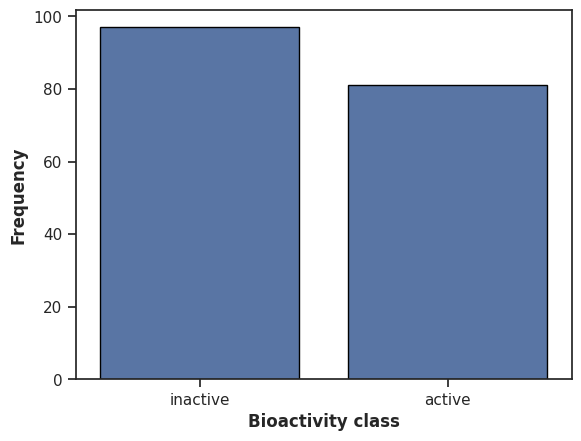

In [96]:
plt.figure()

sns.countplot(x='bioactivity_class', data=df_class, edgecolor='black')

plt.xlabel('Bioactivity class', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')

### Scatter plot MW vs logP

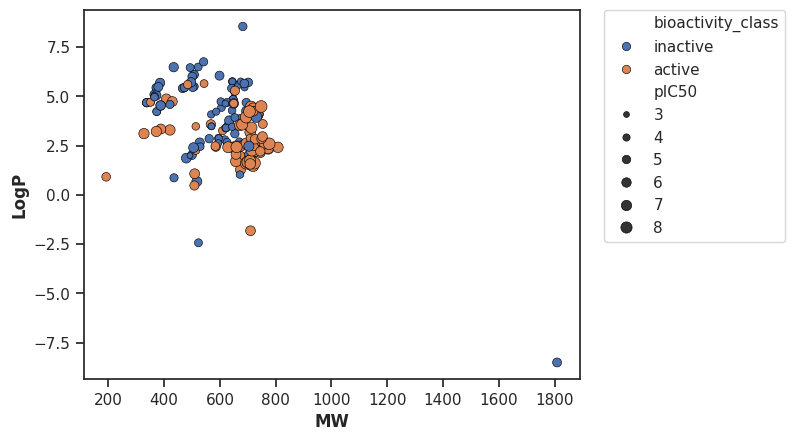

In [102]:
plt.figure()

sns.scatterplot(x='MW', y='LogP', data=df_class, hue='bioactivity_class', size='pIC50', edgecolor='black')

plt.xlabel('MW', fontweight='bold')
plt.ylabel('LogP', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

For the most part, the two bioactivity classes span the same chemical spaces as evident in the plot.

### Box Plots

Text(0, 0.5, 'pIC50 value')

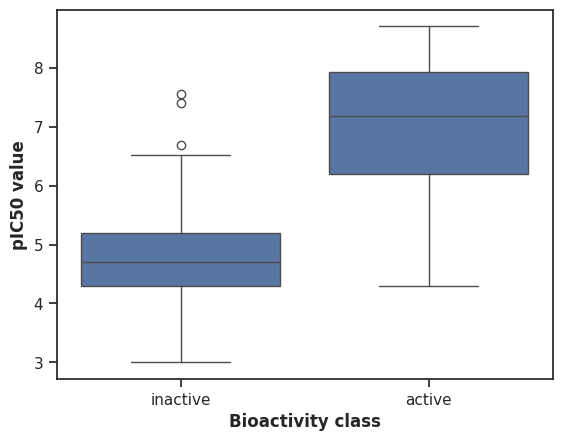

In [98]:
plt.figure()

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_class)

plt.xlabel('Bioactivity class', fontweight='bold')
plt.ylabel('pIC50 value', fontweight='bold')

## Statistical Analysis: Mann-Whitney U Test

The Mann-Whitney U Test is a non-parametric statistical test used to compare two independent groups to determine if their distributions differ.

- **Purpose**:
  - To assess whether there is a statistically significant difference between the distributions of two independent samples.
  
- **Null Hypothesis (H<sub>0</sub>)**:
  - The distributions of both groups are equal.

- **Alternative Hypothesis (H<sub>1</sub>)**:
  - The distributions of the two groups are different (one group tends to have higher or lower values).

- **Assumptions**:
  - The data should be ordinal, interval, or ratio scale.
  - Observations must be independent.

- **Test Statistic**:
  - The U statistic is calculated based on the ranks of the data. A smaller U value indicates a more significant difference between the groups.

- **Interpretation**:
  - A low p-value (typically < 0.05) indicates that the null hypothesis can be rejected, suggesting that the two groups have significantly different distributions.


Code source: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/



In [99]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [100]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,7151.0,4.824056e-21,0.05,Different distribution (reject H0)


### Molecular Weight

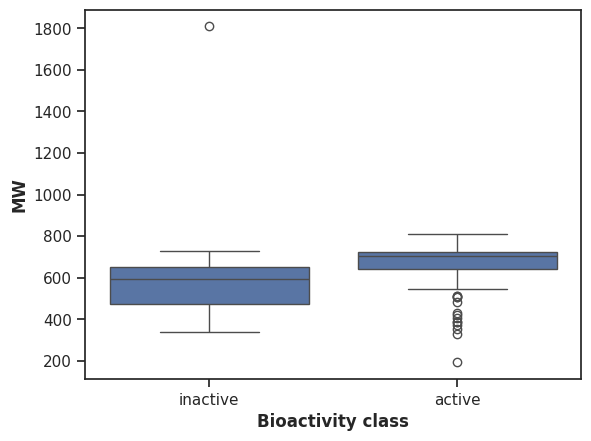

In [104]:
plt.figure()

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_class)

plt.xlabel('Bioactivity class', fontweight='bold')
plt.ylabel('MW', fontweight='bold')

plt.savefig('plot_MW.pdf')

In [105]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,6070.5,3.961478e-10,0.05,Different distribution (reject H0)


### LogP

Text(0, 0.5, 'LogP')

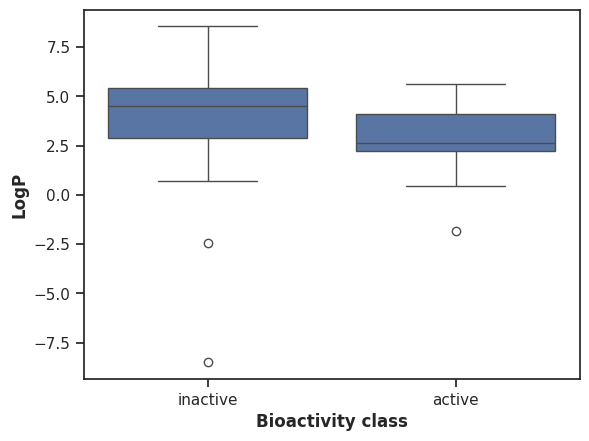

In [106]:
plt.figure()

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_class)

plt.xlabel('Bioactivity class', fontweight='bold')
plt.ylabel('LogP', fontweight='bold')

In [107]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2046.5,3.884272e-08,0.05,Different distribution (reject H0)


### NumHDonors

Text(0, 0.5, 'NumHDonors')

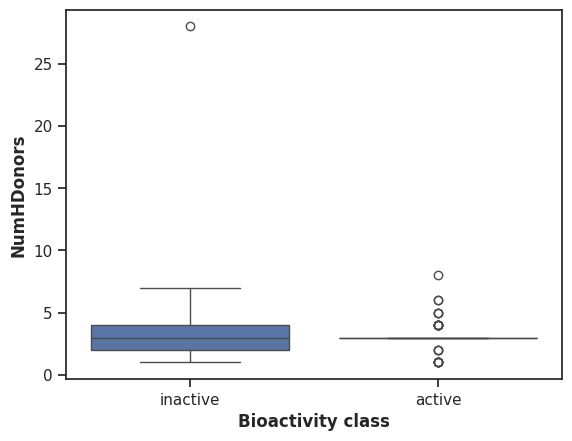

In [108]:
plt.figure()

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_class)

plt.xlabel('Bioactivity class', fontweight='bold')
plt.ylabel('NumHDonors', fontweight='bold')

In [109]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3882.5,0.8882,0.05,Same distribution (fail to reject H0)


### NumHAcceptors

Text(0, 0.5, 'NumHAcceptors')

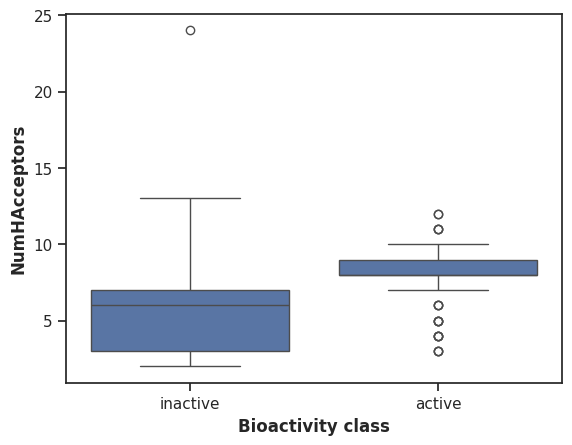

In [110]:
plt.figure()

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_class)

plt.xlabel('Bioactivity class', fontweight='bold')
plt.ylabel('NumHAcceptors', fontweight='bold')

In [111]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,6359.5,7.846423e-13,0.05,Different distribution (reject H0)


### Interpretation of Statistical Results
*Note:* Threshold values were established to categorize compounds as actives or inactives: compounds with an IC50 value of less than 1,000 nM were classified as actives, while those with an IC50 value greater than 10,000 nM were designated as inactives. Correspondingly, this classification aligns with pIC50 values, where pIC50 values exceeding 6 indicate actives and pIC50 values below 5 indicate inactives.<br><br>

##### Box Plots
**PIC50** A statistically significant difference was observed between the active and inactive compounds.

**Lipinski Descriptors** Among the four Lipinski descriptors examined, molecular weight (MW), logP, and the number of hydrogen bond acceptors (NumHAcceptors) exhibited significant statistical differences between the active and inactive groups. In contrast, the number of hydrogen bond donors (NumHDonors) did not demonstrate a statistically significant difference between the two groups.

### Exporting EDA Results

In [112]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: hepatitis_c_bioactivity_data_preprocessed.csv (deflated 87%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 9%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 12%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
